<IPython.core.display.Javascript object>


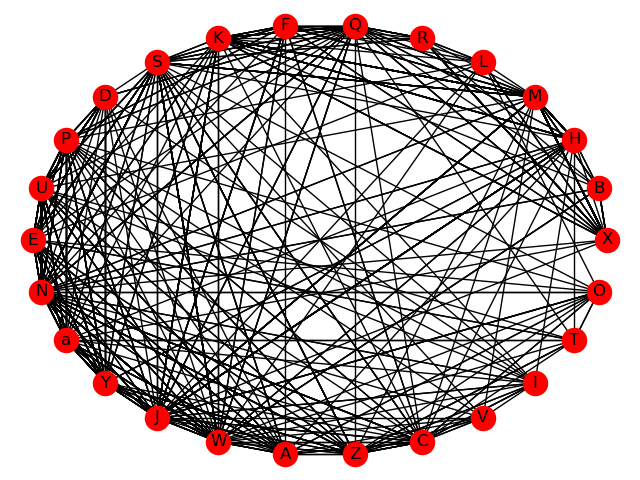

The average shortest path length is:
1.403076923076923
The diameter is:
2
The radius is:
2
The eccentricities are:
{'X': 2, 'B': 2, 'H': 2, 'M': 2, 'L': 2, 'R': 2, 'Q': 2, 'F': 2, 'K': 2, 'S': 2, 'D': 2, 'P': 2, 'U': 2, 'E': 2, 'N': 2, 'a': 2, 'Y': 2, 'J': 2, 'W': 2, 'A': 2, 'Z': 2, 'C': 2, 'V': 2, 'I': 2, 'T': 2, 'O': 2}
The peripheries are:
['X', 'B', 'H', 'M', 'L', 'R', 'Q', 'F', 'K', 'S', 'D', 'P', 'U', 'E', 'N', 'a', 'Y', 'J', 'W', 'A', 'Z', 'C', 'V', 'I', 'T', 'O']
The centers are:
['X', 'B', 'H', 'M', 'L', 'R', 'Q', 'F', 'K', 'S', 'D', 'P', 'U', 'E', 'N', 'a', 'Y', 'J', 'W', 'A', 'Z', 'C', 'V', 'I', 'T', 'O']
The degree centralities are:
{'X': 17.04, 'B': 0.8, 'H': 2.32, 'M': 21.36, 'L': 0.72, 'R': 4.16, 'Q': 2.56, 'F': 1.68, 'K': 5.04, 'S': 4.32, 'D': 2.48, 'P': 2.72, 'U': 10.96, 'E': 4.08, 'N': 8.32, 'a': 3.7600000000000002, 'Y': 5.36, 'J': 3.68, 'W': 4.72, 'A': 1.68, 'Z': 2.32, 'C': 2.16, 'V': 0.48, 'I': 0.72, 'T': 0.56, 'O': 0.8}
The betweenness centralities are:
{'X': 0.006

In [76]:
import xlrd # This module helps read data from Excel file
import networkx as nx
import numpy as np
import pandas as pd
import xlsxwriter # for writing data to Excel file

%matplotlib notebook

# read data from Excel file from local addres
loc = ("Se 2013 Oct Cluster-node list .xlsx")
workbookToRead = xlrd.open_workbook(loc)

#get information of edges from the
def getEdge(startMinute):
    sheet = workbookToRead.sheet_by_index(0) #the index of sheet
    startVertice = sheet.cell_value(startMinute-1, 3) #(row, column) Python starts a list with 0, hence the need of -1
    endVertice = sheet.cell_value(startMinute, 3) 
    if startVertice == "@":
        startVertice = "a"
    if endVertice == "@":
        endVertice = "a"
    return (startVertice, endVertice) # Return the edge. Convert numbers to int, which looks better

# Instantiate the graph
G1 = nx.MultiGraph() # Allow self-loop

# add node/edge pairs
i = 0
while i < 1435: # exhaust the whole spreadsheet
    edge = getEdge(i)
    G1.add_edge(edge[0], edge[1])
    i += 1
#Write to dot file   
f = open("test.dot","w+")
f.write("digraph fig1 {\n")
f.write("	layout=circo\n")

#f.write("	A -> B;\n")
j = 0
listA = []
while j < 1435: # exhaust the whole spreadsheet
    edge = getEdge(j)
    start = edge[0]
    end = edge[1]
    text = "	" + start + " -> " + end + " ;\n"
    if not text in listA:
        listA.append(text)
        f.write(text)
    j += 1
    

f.write("}")
f.close() 

#draw the network G1
nx.draw_circular(G1,with_labels=True)

#Print the measurments of the network
averageShortestPathLength = nx.average_shortest_path_length(G1)
print ("The average shortest path length is:")
print(averageShortestPathLength)

diameter = nx.diameter(G1)
print ("The diameter is:")
print(diameter)

radius = nx.radius(G1)
print ("The radius is:")
print(radius)

eccentricities = nx.eccentricity(G1)
print ("The eccentricities are:")
print(eccentricities)

peripheries = nx.periphery(G1)
print ("The peripheries are:")
print(peripheries)

centers = nx.center(G1)
print ("The centers are:")
print(centers)

dCentralities = nx.degree_centrality(G1) # a dictionary of centralities
#dCentralityMax = max(zip(dCentralities.values(), dCentralities.keys()))
print ("The degree centralities are:")
print (dCentralities)


bCntralities = nx.betweenness_centrality(G1) # a dictionary of centralities
#bCentralityMax = max(zip(bCntralities.values(), bCntralities.keys()))
print ("The betweenness centralities are:")
print (bCntralities)

cCntralities = nx.closeness_centrality(G1)
print ("The closeness centralities are:")
print (cCntralities)

NumNodesToRemove = nx.node_connectivity(G1)
print ("The number of nodes to be removed to disconnect this network:")
print (NumNodesToRemove)

nToRemove = nx.minimum_node_cut(G1)
print ("Which notes to be removed?")
print (nToRemove)

NumEdgesToRemove = nx.edge_connectivity(G1)
print ("The number of edges to be removed to disconnect this network:")
print (NumEdgesToRemove)

eToRemove = nx.minimum_edge_cut(G1)
print ("Which nodes to be removed?")
print (eToRemove)

#Write results to Excel file

# Write a list to specific location
def writeListToExcel(listToWrite,startRow=0,startCol=0):
    row = startRow
    for i in listToWrite:
        worksheet.write(row, startCol, i)
        row += 1
        
# Write a dictinary to specific location
def writeDictToExcel(dictToWrite,startRow=0,startCol=0):
    row = startRow
    keyCol = startCol
    valCol = startCol + 1
    for key, value in dictToWrite.items():
        worksheet.write(row, keyCol, key)
        worksheet.write(row, valCol, value)
        row += 1
        

workbook = xlsxwriter.Workbook('Results.xlsx')
worksheet = workbook.add_worksheet('Overall')

worksheet.write('A1','Average Length')
worksheet.write('A2',averageShortestPathLength)

worksheet.write('B1','Diameter')
worksheet.write('B2',diameter)

worksheet.write('C1','Radius')
worksheet.write('C2',radius)

worksheet.write('D1','NumNodesRm')
worksheet.write('D2',NumNodesToRemove)

worksheet.write('E1','NodesToRm')
writeListToExcel(nToRemove, 1, 4)

worksheet.write('F1','NumEdgesRm')
worksheet.write('F2',NumEdgesToRemove)

#New sheet
worksheet = workbook.add_worksheet('Eccentricities')
worksheet.write('A1','Hello!!')

worksheet.write('B1','Nodes')
worksheet.write('C1','Eccentricities')
writeDictToExcel(eccentricities, 1, 1)

worksheet.write('F1','Peripheries')
writeListToExcel(peripheries, 1, 5)

worksheet.write('G1','Centers')
writeListToExcel(centers, 1, 6)

#??? ?

